# Air Quality Analysis: A Comparative Study

## Introduction

Air quality is a critical environmental issue that affects public health, ecosystem balance, and the climate. Monitoring and analyzing air pollutants can provide valuable insights into the sources of pollution and the effectiveness of air quality regulations and measures. This notebook focuses on the analysis of air quality data from two distinct locations: Cambridge Roadside and Wicken Fen.

### Objectives

- **Data Handling**: Demonstrate how to load, clean, and prepare air quality data for analysis using Python and its powerful libraries such as Pandas and Matplotlib.
- **Comparative Analysis**: Compare the levels of specific air pollutants, including Nitric oxide (NO), Nitrogen dioxide (NO2), and Nitrogen oxides expressed as nitrogen dioxide (NOx), between an urban roadside in Cambridge and a rural site at Wicken Fen.
- **Temporal Trends**: Explore how pollutant levels vary monthly and identify any significant trends or discrepancies between the two sites over the observed period.

### Data Description

The datasets contain measurements of various pollutants, recorded at two monitoring stations:
- **Cambridge Roadside**: Located in an urban setting, this station captures data relevant to traffic-related pollution.
- **Wicken Fen**: Situated in a rural area, this station helps understand background levels of pollutants, mostly unaffected by direct urban emissions.

## Data Loading
The data is loaded from CSV files into Pandas DataFrames.


In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
cambridge_roadside_data = pd.read_csv('CambridgeRoadside_0.csv')
wicken_fen_data = pd.read_csv('WickenFen_0.csv')

## Data Preparation and Cleaning
Here we clean the data by converting pollutant concentration values to numeric types, handling missing values, and formatting the date column.


In [70]:
# Define a function to clean and prepare data
def prepare_and_clean_data(df, pollutant_columns, date_column='Date'):
        """
    Prepares and cleans the data for analysis.
    
    Args:
        df (DataFrame): The DataFrame to clean.
        pollutant_columns (list of str): List of column names containing pollutant data.
        date_column (str): Name of the column containing date information.
    
    Returns:
        DataFrame: Cleaned and prepared DataFrame with pollutants as numeric and date as index.
    """
    # Convert all pollutant columns to strings then to numeric, handling non-numeric issues
    for col in pollutant_columns:
        df[col] = df[col].astype(str).str.extract('(\d+\.?\d*)')[0]
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, coerce errors to NaN
    # Convert 'Date' column to datetime format and set as index
    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True)
    df.set_index(date_column, inplace=True)
    return df

In [71]:
# Specify the pollutants to compare
pollutant_columns_cambridge = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']
pollutant_columns_wicken = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']


In [72]:
# Drop rows where pollutant data is missing

cambridge_roadside_data = cambridge_roadside_data.dropna(subset=pollutant_columns_cambridge)
wicken_fen_data= wicken_fen_data.dropna(subset=pollutant_columns_wicken)

In [73]:
cambridge_roadside_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Date                                 6199 non-null   object
 1   Nitric oxide                         6199 non-null   object
 2   Status                               6199 non-null   object
 3   Nitrogen dioxide                     6199 non-null   object
 4   Status.1                             6199 non-null   object
 5   Nitrogen oxides as nitrogen dioxide  6199 non-null   object
 6   Status.2                             6199 non-null   object
dtypes: object(7)
memory usage: 339.1+ KB


In [74]:
# Clean the datasets
cambridge_cleaned = prepare_and_clean_data(cambridge_roadside_data, pollutant_columns_cambridge)
wicken_cleaned = prepare_and_clean_data(wicken_fen_data, pollutant_columns_wicken)

In [75]:
cambridge_cleaned.head()

,Nitric oxide,Status,Nitrogen dioxide,Status.1,Nitrogen oxides as nitrogen dioxide,Status.2
Date,,,,,,
1999-07-23,61.0,V ugm-3,36.0,V ugm-3,128.0,V ugm-3
1999-07-24,44.0,V ugm-3,43.0,V ugm-3,109.0,V ugm-3
1999-07-25,6.0,V ugm-3,16.0,V ugm-3,26.0,V ugm-3
1999-07-26,9.0,V ugm-3,16.0,V ugm-3,30.0,V ugm-3
1999-07-27,8.0,V ugm-3,19.0,V ugm-3,31.0,V ugm-3
...,...,...,...,...,...,...
2016-07-07,33.0,N ugm-3,30.0,N ugm-3,80.0,N ugm-3
2016-07-08,28.0,N ugm-3,22.0,N ugm-3,65.0,N ugm-3
2016-07-09,39.0,N ugm-3,21.0,N ugm-3,82.0,N ugm-3


## Data Analysis
The data is resampled to compute monthly averages of the pollutants for both locations, allowing for trend analysis over time.


In [80]:
# Resample data to monthly averages, ensuring only numeric data is processed
cambridge_monthly = cambridge_cleaned[pollutant_columns_cambridge].resample('M').mean()
wicken_monthly = wicken_cleaned[pollutant_columns_wicken].resample('M').mean()

## Results and Visualization
This section visualizes the monthly average concentrations of pollutants at both locations, providing insights into temporal variations and differences between the two sites.


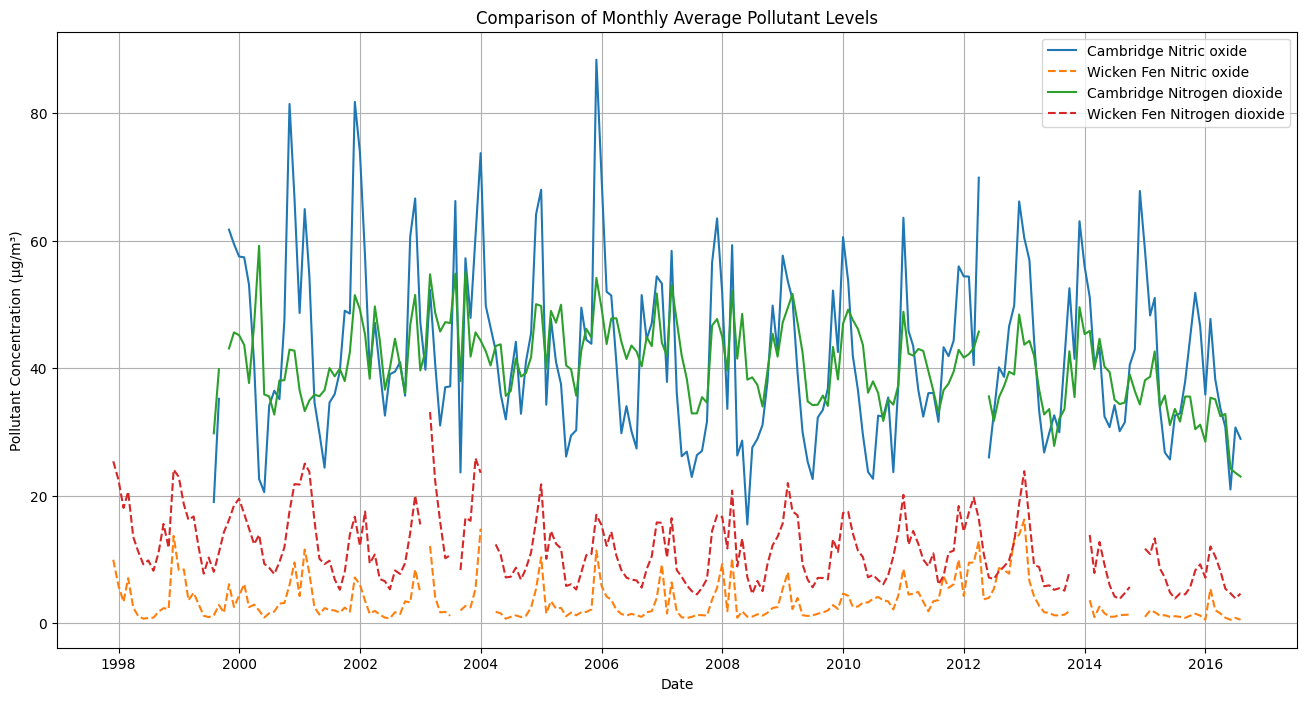

In [81]:
# Plotting
plt.figure(figsize=(16, 8))
common_pollutants = set(cambridge_monthly.columns) & set(wicken_monthly.columns)
for pollutant in common_pollutants:
    if pollutant in ['Nitric oxide', 'Nitrogen dioxide']:  # Only plot pollutants found in both datasets
        plt.plot(cambridge_monthly.index, cambridge_monthly[pollutant], label=f'Cambridge {pollutant}')
        plt.plot(wicken_monthly.index, wicken_monthly[pollutant], linestyle='--', label=f'Wicken Fen {pollutant}')

plt.title('Comparison of Monthly Average Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

## Detailed Analysis of Pollution Trends

The graph above presents a visual comparison of monthly average pollutant levels, specifically Nitric oxide and Nitrogen dioxide, measured at Cambridge Roadside and Wicken Fen over a period spanning from 1998 to 2016. Several insights can be gleaned from this visualization:

### Key Observations:

1. **Higher Peaks in Urban Areas**: Cambridge Roadside consistently shows higher concentrations of both pollutants compared to Wicken Fen. This is indicative of the higher emission sources associated with urban environments, likely due to traffic and industrial activities.

2. **Seasonal Variation**: There is a clear seasonal pattern in the pollutant levels at both sites, with peaks generally occurring in the colder months. This seasonal trend could be linked to increased heating emissions and stable atmospheric conditions that hinder pollutant dispersion.

3. **Declining Trend**: Over the years, there is a visible decrease in the peaks of pollutant levels at Cambridge Roadside. This downward trend might reflect the impact of improved fuel technology and stringent emission regulations over time.

4. **Comparison Between Pollutants**:
   - **Nitric Oxide**: Shows more pronounced seasonal and year-to-year variations compared to Nitrogen dioxide. The peaks in Nitric oxide are sharper and higher, especially in the urban setting of Cambridge, suggesting it is more directly influenced by local emission sources.
   - **Nitrogen Dioxide**: Although the concentration levels are generally lower than Nitric oxide, the pattern over time is smoother, which might indicate a broader range of sources or different chemical lifetimes and reactions in the atmosphere.

### Implications:

The comparative analysis of these pollutants at both a rural and an urban site provides critical insights into the sources and behaviors of air pollution. Understanding these patterns helps in assessing the efficacy of air quality management strategies and in planning for future environmental and public health initiatives.

### Further Research:

Further research could explore the effects of specific emission reduction policies implemented over the years and their direct impact on the observed trends. Additionally, incorporating data on meteorological conditions could help elucidate the extent to which weather patterns affect pollutant concentrations.
